In [176]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf
import random
import os
import joblib
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [13]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [14]:
print(df['status_label'].value_counts())

status_label
alive     73462
failed     5220
Name: count, dtype: int64


In [4]:
# df = df[df['X1'] <= df['X10']]
# f.info()

# Simple Neural Network

## Define function

- 'class_weight_dict' allows for custom class weights, default equal weights
- 'verbose' shows training information
- 'plot' plots confusion matrix
- Default (model_type) is 3 Hidden layers: 128->64->32

In [15]:
def train_nn(X_train, y_train, X_val, y_val, X_test, y_test, class_weight_dict = {0: 1.0, 1: 1.0}, verbose=1, plot=1, model_type=2):

    # Encode target labels as 0 and 1
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)  # 0 for "alive", 1 for "failed"
    y_test_encoded = le.transform(y_test)
    y_val_encoded = le.transform(y_val)
    
    # Define the neural network model
    if model_type == 1:
        model = Sequential([
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(1, activation='sigmoid')  # Binary classification output
        ])
    elif model_type == 2:
        model = Sequential([
            Dense(128, activation='relu', input_dim=(X_train.shape[1])),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(1, activation='sigmoid')  # Binary classification output
        ])
    elif model_type == 3:
        model = Sequential([
            Dense(256, activation='relu', input_dim=(X_train.shape[1])),
            BatchNormalization(),
            Dropout(0.3),
        
            Dense(128, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(64, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(32, activation='relu'),
            BatchNormalization(),
            Dropout(0.3),
            
            Dense(1, activation='sigmoid')  # Binary classification output
        ])
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train the model
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    model.fit(X_train, y_train_encoded, epochs=100, batch_size=32, validation_data=(X_val, y_val_encoded), verbose=verbose, class_weight=class_weight_dict, callbacks=[early_stopping])
    
    # Predict labels for train set
    y_train_pred = model.predict(X_train)
    
    # Predict labels for test set
    y_test_pred = model.predict(X_test)
    
    # Convert probabilities to binary labels (0 or 1)
    y_train_pred_classes = (y_train_pred > 0.5).astype("int32")
    y_test_pred_classes = (y_test_pred > 0.5).astype("int32")

    # Compute Precision, F1-score and Recall
    train_precision = precision_score(y_train_encoded, y_train_pred_classes)
    train_f1 = f1_score(y_train_encoded, y_train_pred_classes)
    train_recall = recall_score(y_train_encoded, y_train_pred_classes)
    test_precision = precision_score(y_test_encoded, y_test_pred_classes)
    test_f1 = f1_score(y_test_encoded, y_test_pred_classes)
    test_recall = recall_score(y_test_encoded, y_test_pred_classes)

    # Evaluate the model
    print("\nTrain set evaluation:")
    train_loss, train_accuracy = model.evaluate(X_train, y_train_encoded, verbose=0)
    print("Train Loss:", train_loss)
    print("Train Accuracy:", train_accuracy)
    print("Train Precision:", train_precision)
    print("Train F1 Score:", train_f1)
    print("Train Recall:", train_recall)
    
    print("\nTest set evaluation:")
    test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=0)
    print("Test Loss:", test_loss)
    print("Test Accuracy:", test_accuracy)
    print("Test Precision:", test_precision)
    print("Test F1 Score:", test_f1)
    print("Test Recall:", test_recall)

    if (plot):
        # Plot the Confusion Matrix for Train and Test
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
        sns.heatmap(confusion_matrix(y_train_encoded, y_train_pred_classes),
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
        sns.heatmap(confusion_matrix(y_test_encoded, y_test_pred_classes),
                   annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
    else:
        print("Train set: ")
        print(confusion_matrix(y_train_encoded, y_train_pred_classes))
        print("Test set: ")
        print(confusion_matrix(y_test_encoded, y_test_pred_classes))

    return model

## Set seeds

In [141]:
# Set a fixed seed for reproducibility
SEED = 99

# 1. Set NumPy seed
np.random.seed(SEED)

# 2. Set Python's built-in random seed
random.seed(SEED)

# 3. Set TensorFlow seed
tf.random.set_seed(SEED)

# 4. Ensure TensorFlow runs deterministically
os.environ['PYTHONHASHSEED'] = str(SEED)
tf.config.experimental.enable_op_determinism()


## Convert X data into ratios relative to total assets

In [16]:
cols = df.columns.difference(["company_name", "status_label", "year"])

df[cols] = df[cols].div(df['X10'],axis=0)

df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,0.689971,1.124304,0.024795,0.120150,0.453467,0.047454,0.173210,...,1.382369,1.0,0.243519,0.095355,0.258065,0.221075,0.271291,1.382369,0.541814,1.262219
1,C_1,alive,2000,0.692247,1.017036,0.026468,0.091710,0.456776,0.026403,0.164118,...,1.245637,1.0,0.256445,0.065241,0.228600,0.178658,0.290751,1.245637,0.515267,1.153927
2,C_1,alive,2001,0.614836,0.741309,0.031676,0.038309,0.403532,-0.082989,0.109164,...,0.899355,1.0,0.306532,0.006633,0.158046,0.211862,0.196569,0.899355,0.563172,0.861046
3,C_1,alive,2002,0.577337,0.723466,0.039574,0.044777,0.378599,-0.018074,0.096592,...,0.883074,1.0,0.239809,0.005204,0.159608,0.296488,0.180749,0.883074,0.570377,0.838297
4,C_1,alive,2003,0.609346,0.737781,0.037615,0.066955,0.348580,0.004940,0.147557,...,0.919167,1.0,0.350583,0.029341,0.181387,0.185059,0.185938,0.919167,0.574669,0.852212


## Split into training, validation and test sets using Train-Test-Split

In [17]:
df_train, temp_df = train_test_split(df, test_size=0.3, stratify=df['status_label'], random_state=99)
df_val, df_test = train_test_split(temp_df, test_size=0.5, stratify=temp_df['status_label'], random_state=99)


In [18]:
df.groupby("year")["status_label"].value_counts(normalize=True).unstack()

status_label,alive,failed
year,,
1999,0.928410,0.071590
2000,0.922694,0.077306
2001,0.915458,0.084542
2002,0.910987,0.089013
2003,0.906045,0.093955
2004,0.907084,0.092916
2005,0.909869,0.090131
2006,0.911337,0.088663
2007,0.916189,0.083811


In [19]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
contingency_table = pd.crosstab(df["year"], df["status_label"])

# Perform chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")


Chi-Square Statistic: 731.2001247028753, P-value: 8.730479710760694e-143


Year is a significant factor in determining status_label. However, since we lack additional context such as the economic conditions of specific years, we aim to prevent the model from overfitting to time-based patterns. Instead, we want it to generalise well across different time periods and economic conditions. Therefore, we use random splitting with train_test_split rather than splitting by year. Additionally, we enable stratified sampling to ensure that the number of instances in the 'Failed' class is balanced across the training, validation, and test sets.

### Split into X and y data

In [22]:
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year", "X10"]) # drop X10 since it is all 1

y_val = df_val["status_label"]
X_val = df_val.drop(columns = ["company_name", "status_label", "year", "X10"])

y_test = df_test["status_label"]
X_test = df_test.drop(columns = ["company_name", "status_label", "year", "X10"])

## No balancing

### Keras

Epoch 1/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8343 - loss: 0.4158 - val_accuracy: 0.9328 - val_loss: 0.2534
Epoch 2/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9324 - loss: 0.2435 - val_accuracy: 0.9335 - val_loss: 0.2410
Epoch 3/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9340 - loss: 0.2353 - val_accuracy: 0.9327 - val_loss: 0.2548
Epoch 4/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9341 - loss: 0.2328 - val_accuracy: 0.9254 - val_loss: 0.2913
Epoch 5/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9341 - loss: 0.2311 - val_accuracy: 0.9335 - val_loss: 0.2435
Epoch 6/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9341 - loss: 0.2289 - val_accuracy: 0.9331 - val_loss: 0.2549
Epoch 7/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9341 - loss: 0.2282 - val_accuracy: 0.9331 - val_loss: 0.2559
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/st

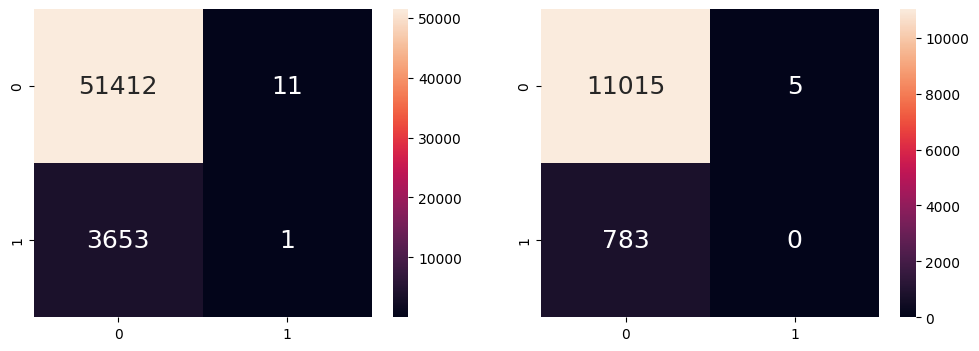

In [110]:
model_unbalanced = train_nn(X_train, y_train, X_val, y_val, X_test, y_test)

#### Lowering threshold

In [113]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_unbalanced.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step
Optimal Threshold: 0.071475476


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.95      0.73      0.82     11020
           1       0.10      0.45      0.17       783

    accuracy                           0.71     11803
   macro avg       0.53      0.59      0.50     11803
weighted avg       0.89      0.71      0.78     11803



<Axes: >

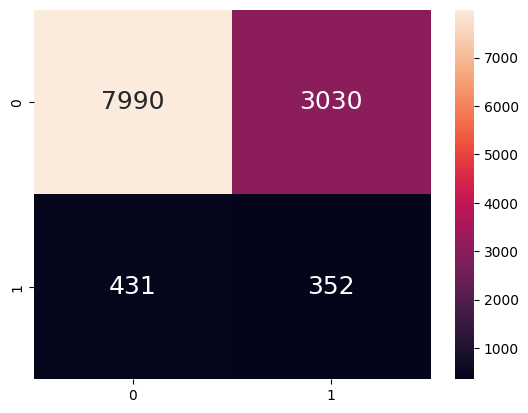

In [114]:
threshold = optimal_threshold
y_pred_probs = model_unbalanced.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Balancing dataset

In [24]:
print("Train set:")
print(df_train['status_label'].value_counts())

print("\nValidation set:")
print(df_val['status_label'].value_counts())

print("\nTest set: ")
print(df_test['status_label'].value_counts())


Train set:
status_label
alive     51423
failed     3654
Name: count, dtype: int64

Validation set:
status_label
alive     11019
failed      783
Name: count, dtype: int64

Test set: 
status_label
alive     11020
failed      783
Name: count, dtype: int64


### Undersample Majority class in train set

#### Trying every integer ratio of Majority class : Minority class

In [125]:
def undersample(df_train, df_val, df_test, n, plot=0):
    df_majority = df_train[df_train.status_label == "alive"]
    df_minority = df_train[df_train.status_label == "failed"]
    
    # Downsample majority class
    df_majority_downsampled = resample(
        df_majority, 
        replace=False, 
        n_samples=n*len(df_minority), 
        random_state=99
    )
    
    df_balanced = pd.concat([df_majority_downsampled, df_minority])
    df_balanced.head()
    df_balanced.info()

    # Split into X and y variables
    X_train_undersampled = df_balanced.drop(columns=["status_label", "company_name", "year", "X10"])  # Features
    y_train_undersampled = df_balanced["status_label"]  # Target column

    X_val = df_val.drop(columns=["status_label", "company_name", "year", "X10"])
    y_val = df_val["status_label"]

    X_test = df_test.drop(columns=["status_label", "company_name", "year", "X10"])
    y_test = df_test["status_label"]
    
    print("Ratio is " + str(n) + " : " + str(1))
    temp = train_nn(X_train_undersampled, y_train_undersampled, X_val, y_val, X_test, y_test,verbose=0,plot=0)
    
    # find best threshold and change to it
    y_test_encoded = y_test.map({"alive": 0, "failed": 1})
    y_pred_probs = temp.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
    optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
    optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
    print("Optimal Threshold:", optimal_threshold)

    threshold = optimal_threshold
    y_pred_probs = temp.predict(X_test)  # Get probabilities
    y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
    if (plot):
        print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
        print("Test set with optimal threshold: ")
        sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})
    else:
        print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
        print("Test set with optimal threshold: ")
        print(confusion_matrix(y_test_encoded, y_pred))

    return temp

In [118]:
for i in range(1, 12):
    undersample(df_train, df_val, df_test, i)

<class 'pandas.core.frame.DataFrame'>
Index: 7308 entries, 26284 to 38886
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  7308 non-null   object 
 1   status_label  7308 non-null   object 
 2   year          7308 non-null   int64  
 3   X1            7308 non-null   float64
 4   X2            7308 non-null   float64
 5   X3            7308 non-null   float64
 6   X4            7308 non-null   float64
 7   X5            7308 non-null   float64
 8   X6            7308 non-null   float64
 9   X7            7308 non-null   float64
 10  X8            7308 non-null   float64
 11  X9            7308 non-null   float64
 12  X10           7308 non-null   float64
 13  X11           7308 non-null   float64
 14  X12           7308 non-null   float64
 15  X13           7308 non-null   float64
 16  X14           7308 non-null   float64
 17  X15           7308 non-null   float64
 18  X16           7308 non-null 

Besr ratio is 6:1, let's retrain it and plot the confusion matrix. Despite setting the seeds at the beginning of the notebook and whereever possible, there is still some randomness that result in slightly different model performance each time.

<class 'pandas.core.frame.DataFrame'>
Index: 25578 entries, 26284 to 38886
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  25578 non-null  object 
 1   status_label  25578 non-null  object 
 2   year          25578 non-null  int64  
 3   X1            25578 non-null  float64
 4   X2            25578 non-null  float64
 5   X3            25578 non-null  float64
 6   X4            25578 non-null  float64
 7   X5            25578 non-null  float64
 8   X6            25578 non-null  float64
 9   X7            25578 non-null  float64
 10  X8            25578 non-null  float64
 11  X9            25578 non-null  float64
 12  X10           25578 non-null  float64
 13  X11           25578 non-null  float64
 14  X12           25578 non-null  float64
 15  X13           25578 non-null  float64
 16  X14           25578 non-null  float64
 17  X15           25578 non-null  float64
 18  X16           25578 non-nul

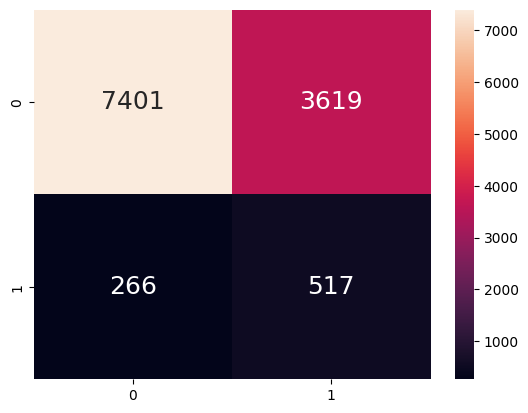

In [140]:
model61 = undersample(df_train, df_val, df_test, 6, plot=1)

In [178]:
# Export model
model61.save("nn_model61.keras")  # Save as keras format

### Synthetic Minority Over-sampling Technique (SMOTE)

In [27]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE with a 50% ratio
smote = SMOTE(sampling_strategy=0.5, random_state=99) 

# Apply SMOTE only to training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_oversampled))


Before SMOTE: Counter({'alive': 51423, 'failed': 3654})
After SMOTE: Counter({'alive': 51423, 'failed': 25711})


#### Keras without scaling

Epoch 1/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6434 - loss: 0.6766 - val_accuracy: 0.9316 - val_loss: 0.3727
Epoch 2/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6929 - loss: 0.5832 - val_accuracy: 0.9257 - val_loss: 0.3836
Epoch 3/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6972 - loss: 0.5720 - val_accuracy: 0.9219 - val_loss: 0.4109
Epoch 4/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7039 - loss: 0.5652 - val_accuracy: 0.9132 - val_loss: 0.4531
Epoch 5/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7020 - loss: 0.5641 - val_accuracy: 0.9282 - val_loss: 0.4054
Epoch 6/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7063 - loss: 0.5588 - val_accuracy: 0.9259 - val_loss: 0.4168
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 2s 855us/step
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step

Train set evaluation:
Train Loss: 0.6176727414131165
Train Accuracy: 0.6677340865135193
Train Precision: 0.6145251396648045
T

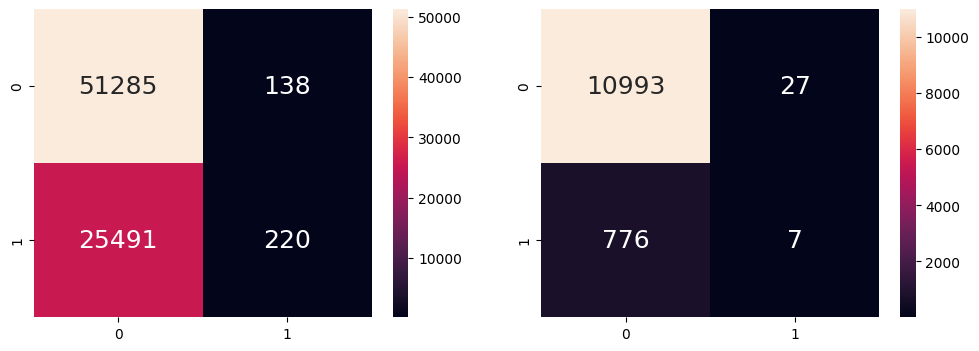

In [28]:
model1 = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test)

##### Lowering threshold

In [102]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Optimal Threshold: 0.3216168


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.95      0.55      0.69     11020
           1       0.09      0.60      0.15       783

    accuracy                           0.55     11803
   macro avg       0.52      0.57      0.42     11803
weighted avg       0.89      0.55      0.66     11803



<Axes: >

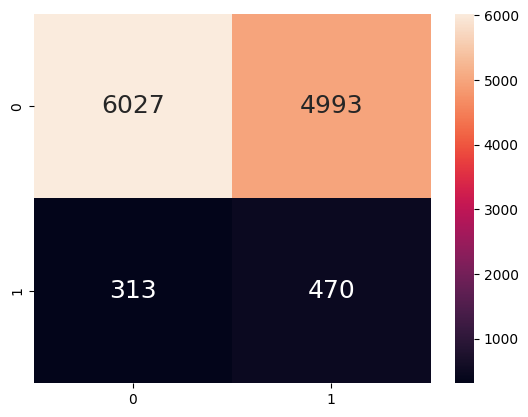

In [103]:
threshold = optimal_threshold
y_pred_probs = model1.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

##### Try a simpler model

2 Hidden layers:>64->32

Epoch 1/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6198 - loss: 0.7044 - val_accuracy: 0.8987 - val_loss: 0.4521
Epoch 2/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6776 - loss: 0.5937 - val_accuracy: 0.9028 - val_loss: 0.4209
Epoch 3/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6880 - loss: 0.5819 - val_accuracy: 0.8943 - val_loss: 0.4088
Epoch 4/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6962 - loss: 0.5744 - val_accuracy: 0.9007 - val_loss: 0.4106
Epoch 5/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6988 - loss: 0.5705 - val_accuracy: 0.9002 - val_loss: 0.4127
Epoch 6/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7049 - loss: 0.5667 - val_accuracy: 0.8920 - val_loss: 0.4192
Epoch 7/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7038 - loss: 0.5636 - val_accuracy: 0.9165 - val_loss: 0.4074
Epoch 8/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7078 - loss: 0

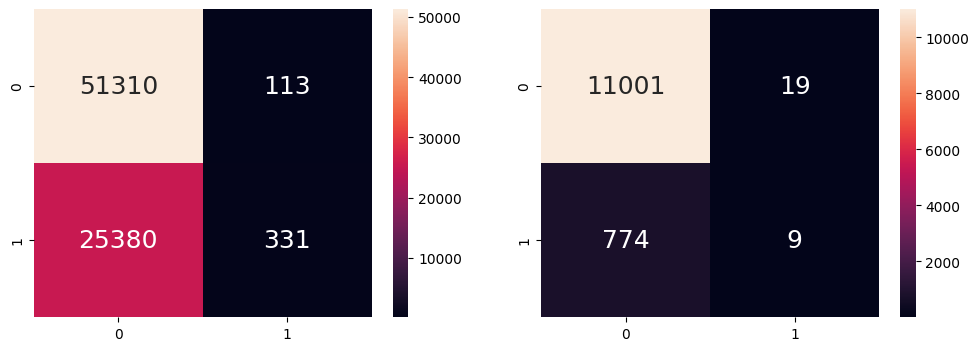

In [51]:
model2 = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=1)

###### Lowering threshold

In [104]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step
Optimal Threshold: 0.29782584


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.64      0.77     11020
           1       0.12      0.69      0.20       783

    accuracy                           0.64     11803
   macro avg       0.54      0.66      0.49     11803
weighted avg       0.91      0.64      0.73     11803



<Axes: >

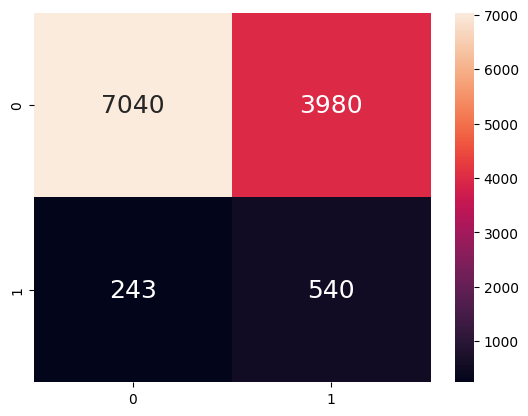

In [105]:
threshold = optimal_threshold
y_pred_probs = model2.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

##### Try a deeper model

4 Hidden layers: 256->128->64->32

Epoch 1/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6234 - loss: 0.6671 - val_accuracy: 0.8550 - val_loss: 0.4365
Epoch 2/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6837 - loss: 0.5873 - val_accuracy: 0.8493 - val_loss: 0.4274
Epoch 3/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6941 - loss: 0.5766 - val_accuracy: 0.8746 - val_loss: 0.3938
Epoch 4/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7010 - loss: 0.5681 - val_accuracy: 0.8671 - val_loss: 0.4024
Epoch 5/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.7022 - loss: 0.5604 - val_accuracy: 0.8778 - val_loss: 0.3924
Epoch 6/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.7102 - loss: 0.5540 - val_accuracy: 0.8901 - val_loss: 0.3738
Epoch 7/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7140 - loss: 0.5500 - val_accuracy: 0.8977 - val_loss: 0.3695
Epoch 8/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7149 - loss

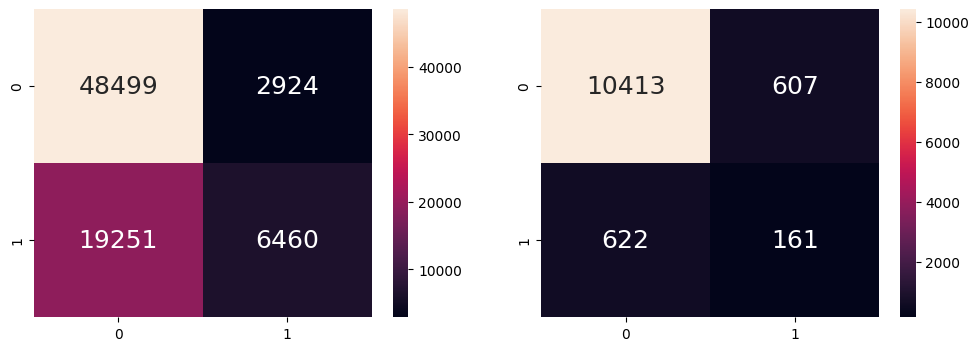

In [54]:
model3 = train_nn(X_train_oversampled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=3)

###### Lowering threshold

In [106]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Optimal Threshold: 0.2686578


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.67      0.79     11020
           1       0.13      0.68      0.22       783

    accuracy                           0.67     11803
   macro avg       0.55      0.68      0.51     11803
weighted avg       0.91      0.67      0.76     11803



<Axes: >

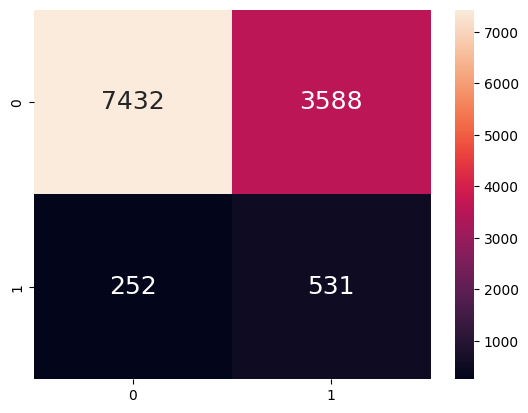

In [107]:
threshold = optimal_threshold
y_pred_probs = model3.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

In [180]:
# Export model
model3.save("nn_smote.keras")  # Save as keras format

#### Keras with scaling of X variables

In [32]:
from sklearn.preprocessing import StandardScaler

# Create new dataframes
X_train_scaled = pd.DataFrame(X_train_oversampled)
X_val_scaled = pd.DataFrame(X_val)
X_test_scaled = pd.DataFrame(X_test)

# Scale train set data
scaler = StandardScaler()

X_train_scaled[:] = scaler.fit_transform(X_train_oversampled[:])

# Transform validation and test sets using the same scaler
X_val_scaled[:] = scaler.transform(X_val[:])
X_test_scaled[:] = scaler.transform(X_test[:])

X_train_scaled.describe()
X_val_scaled.describe()
X_test_scaled.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04,7.713400e+04
mean,-2.210831e-17,-3.638660e-18,1.167595e-17,2.763539e-19,-2.726692e-17,-8.682119e-18,1.562321e-16,-3.592601e-18,1.547582e-17,-1.427829e-18,3.684719e-18,-1.243593e-18,-6.125845e-18,-7.277319e-18,1.547582e-17,5.135577e-18,-6.448258e-18
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-4.943284e+00,-2.734830e-01,-6.633162e-02,-1.718280e+02,-7.900618e-01,-1.163498e+02,-1.263132e+00,-2.231159e-02,-4.478583e+00,-2.836260e-02,-1.669155e+02,-2.115211e+02,-3.588590e-02,-1.119300e+02,-4.478583e+00,-4.181866e-02,-2.199189e-01
25%,-8.279629e-01,-1.403285e-01,-3.988152e-02,3.923662e-02,-7.667014e-01,3.914027e-02,-7.470479e-01,-2.109143e-02,-2.544736e-01,-2.532554e-02,3.895226e-02,-2.129795e-02,-3.242826e-02,4.022909e-02,-2.544736e-01,-3.422830e-02,-1.212496e-01
50%,-1.681599e-02,-7.731434e-02,-2.340329e-02,5.927372e-02,-3.956121e-01,5.312650e-02,-2.327811e-01,-1.973985e-02,-1.022882e-01,-1.468518e-02,5.932350e-02,1.524990e-02,-3.017853e-02,4.563285e-02,-1.022882e-01,-2.950310e-02,-7.204466e-02
75%,8.090355e-01,2.480715e-02,1.137737e-03,6.787191e-02,4.085093e-01,5.713834e-02,4.525593e-01,-1.685182e-02,1.160384e-01,1.088108e-03,6.711417e-02,6.207322e-02,-2.642104e-02,4.698911e-02,1.160384e-01,-2.461772e-02,4.460409e-03
max,2.293963e+00,1.872282e+02,2.448771e+02,5.091489e+00,6.221935e+00,1.886421e+01,6.911213e+00,1.937868e+02,1.282057e+02,2.718177e+02,4.886792e+00,3.640744e+01,1.614101e+02,1.575041e-01,1.282057e+02,1.437802e+02,1.494815e+02


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000,11802.000000
mean,0.075048,0.035150,-0.008163,-0.016628,-0.032988,-0.003814,0.044111,-0.001000,-0.000643,-0.008325,-0.014899,-0.041804,-0.003436,-0.010913,-0.000643,-0.001873,0.013826
std,0.993457,3.400494,0.255408,1.987153,0.955609,1.198663,1.046376,0.626217,1.450005,0.060338,1.909249,3.293491,0.658811,1.240459,1.450005,0.757334,2.030124
min,-1.893263,-0.192084,-0.066332,-142.901163,-0.790062,-80.622244,-1.138965,-0.022312,-11.543245,-0.025476,-136.912047,-243.851846,-0.035872,-69.191171,-11.543245,-0.041806,-0.179430
25%,-0.721839,-0.142389,-0.041571,0.041877,-0.789674,0.041544,-0.738485,-0.020788,-0.243495,-0.025476,0.041797,-0.016868,-0.032446,0.041037,-0.243495,-0.035055,-0.120449
50%,0.083405,-0.083045,-0.026146,0.060250,-0.404274,0.054158,-0.174366,-0.019342,-0.102492,-0.017491,0.060791,0.018679,-0.030324,0.045847,-0.102492,-0.030353,-0.074864
75%,0.886000,0.014489,-0.004243,0.069097,0.374036,0.057863,0.502844,-0.016267,0.099426,-0.001891,0.068538,0.064198,-0.026814,0.047197,0.099426,-0.025647,-0.005174
max,1.926942,292.435870,20.267741,0.636483,5.783685,0.909792,6.911213,56.122749,147.586539,5.019377,0.618237,8.088141,40.989366,0.072547,147.586539,51.349997,170.353416


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
count,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000,11803.000000
mean,0.078106,0.004665,-0.007592,-0.001131,-0.026409,0.000285,0.057867,-0.009655,-0.000752,-0.006731,-0.000123,-0.006001,0.004748,-0.004938,-0.000752,0.002364,0.000702
std,0.997082,1.036490,0.249881,0.914027,0.967749,0.810976,1.047518,0.204200,0.622106,0.115941,0.888681,1.157945,0.965470,1.287491,0.622106,0.877812,0.866214
min,-1.892523,-0.192084,-0.066332,-51.795636,-0.790062,-40.146407,-1.138965,-0.022311,-0.414809,-0.025476,-49.646393,-87.544022,-0.035870,-112.695851,-0.414809,-0.041801,-0.179122
25%,-0.726107,-0.140712,-0.042223,0.042840,-0.790062,0.042190,-0.716175,-0.020837,-0.243155,-0.025476,0.042898,-0.016805,-0.032392,0.041094,-0.243155,-0.034948,-0.120170
50%,0.067514,-0.081000,-0.026454,0.060267,-0.397253,0.054164,-0.176810,-0.019372,-0.096274,-0.016998,0.060679,0.019273,-0.030318,0.045837,-0.096274,-0.030373,-0.073713
75%,0.883285,0.017427,-0.002699,0.068839,0.385285,0.057979,0.531277,-0.016348,0.106570,-0.001554,0.068476,0.064644,-0.026815,0.047188,0.106570,-0.025624,-0.001558
max,1.926942,74.156812,19.500782,0.770326,5.960618,5.499991,6.589205,19.124012,35.529995,8.244775,0.746478,14.314794,70.722249,0.056064,35.529995,62.992138,49.889393


Epoch 1/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.6237 - loss: 0.6790 - val_accuracy: 0.8889 - val_loss: 0.4319
Epoch 2/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6807 - loss: 0.5907 - val_accuracy: 0.8630 - val_loss: 0.5049
Epoch 3/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6862 - loss: 0.5805 - val_accuracy: 0.8790 - val_loss: 0.4403
Epoch 4/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6951 - loss: 0.5752 - val_accuracy: 0.8350 - val_loss: 0.4631
Epoch 5/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6989 - loss: 0.5704 - val_accuracy: 0.8791 - val_loss: 0.4262
Epoch 6/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7075 - loss: 0.5649 - val_accuracy: 0.8818 - val_loss: 0.4372
Epoch 7/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7093 - loss: 0.5583 - val_accuracy: 0.8252 - val_loss: 0.4482
Epoch 8/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7097 - loss: 0

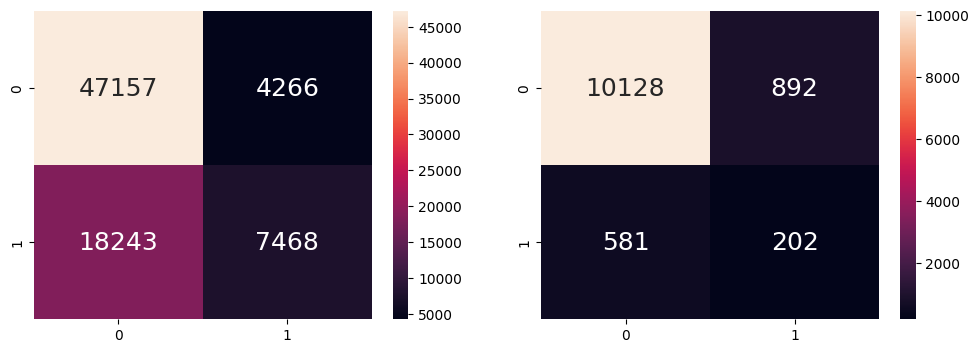

In [35]:
model0 = train_nn(X_train_scaled, y_train_oversampled, X_val, y_val, X_test, y_test)

##### Lowering threshold

In [108]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model0.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 917us/step
Optimal Threshold: 0.37262094


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.96      0.70      0.81     11020
           1       0.13      0.63      0.21       783

    accuracy                           0.69     11803
   macro avg       0.55      0.66      0.51     11803
weighted avg       0.91      0.69      0.77     11803



<Axes: >

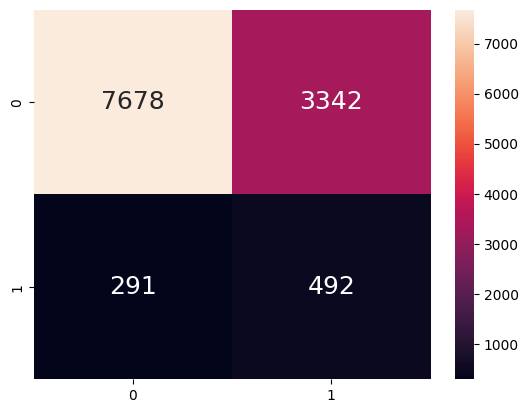

In [109]:
threshold = optimal_threshold
y_pred_probs = model0.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

##### Try a simpler model

2 Hidden layers:>64->32

Epoch 1/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6245 - loss: 0.6788 - val_accuracy: 0.8898 - val_loss: 0.4473
Epoch 2/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.6833 - loss: 0.5922 - val_accuracy: 0.8825 - val_loss: 0.4374
Epoch 3/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.6932 - loss: 0.5818 - val_accuracy: 0.9013 - val_loss: 0.4151
Epoch 4/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7000 - loss: 0.5760 - val_accuracy: 0.8807 - val_loss: 0.4219
Epoch 5/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 2s 994us/step - accuracy: 0.7034 - loss: 0.5703 - val_accuracy: 0.8992 - val_loss: 0.4239
Epoch 6/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 2s 989us/step - accuracy: 0.7043 - loss: 0.5658 - val_accuracy: 0.8893 - val_loss: 0.4307
Epoch 7/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7071 - loss: 0.5631 - val_accuracy: 0.9049 - val_loss: 0.4150
Epoch 8/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.7107

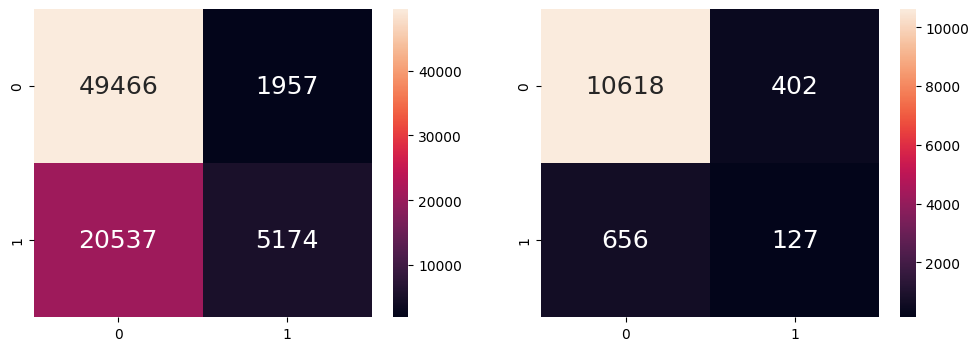

In [144]:
model_scaled1 = train_nn(X_train_scaled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=1)

###### Lowering threshold

In [145]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_scaled1.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 526us/step
Optimal Threshold: 0.3368681


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.96      0.68      0.79     11020
           1       0.12      0.64      0.21       783

    accuracy                           0.67     11803
   macro avg       0.54      0.66      0.50     11803
weighted avg       0.91      0.67      0.76     11803



<Axes: >

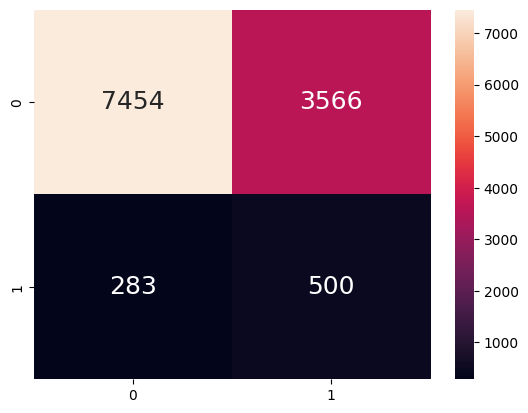

In [146]:
threshold = optimal_threshold
y_pred_probs = model_scaled1.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

##### Try a deeper model

4 Hidden layers: 256->128->64->32

Epoch 1/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6204 - loss: 0.6869 - val_accuracy: 0.8467 - val_loss: 0.4516
Epoch 2/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6820 - loss: 0.5877 - val_accuracy: 0.8377 - val_loss: 0.4387
Epoch 3/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6915 - loss: 0.5777 - val_accuracy: 0.8593 - val_loss: 0.4101
Epoch 4/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7003 - loss: 0.5690 - val_accuracy: 0.8669 - val_loss: 0.4023
Epoch 5/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7041 - loss: 0.5623 - val_accuracy: 0.8679 - val_loss: 0.3885
Epoch 6/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7091 - loss: 0.5556 - val_accuracy: 0.8796 - val_loss: 0.3833
Epoch 7/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7116 - loss: 0.5506 - val_accuracy: 0.8881 - val_loss: 0.3717
Epoch 8/100
2411/2411 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7150 - loss: 0

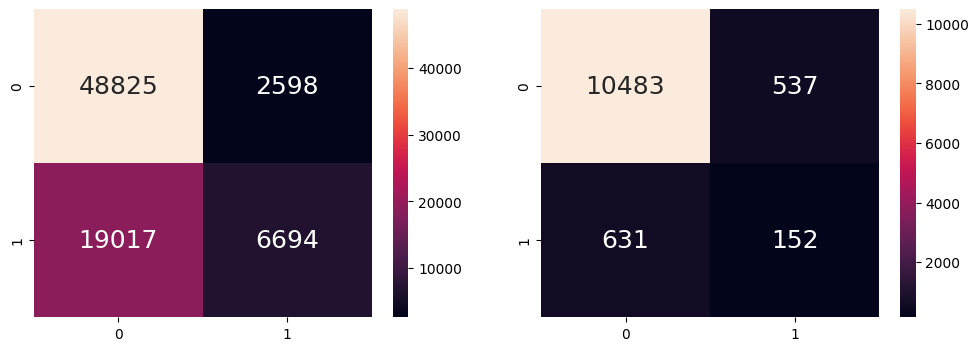

In [147]:
model_scaled2 = train_nn(X_train_scaled, y_train_oversampled, X_val, y_val, X_test, y_test, model_type=3)

###### Lowering threshold

In [148]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_scaled2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step
Optimal Threshold: 0.23043847


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.97      0.64      0.77     11020
           1       0.12      0.72      0.21       783

    accuracy                           0.65     11803
   macro avg       0.55      0.68      0.49     11803
weighted avg       0.91      0.65      0.73     11803



<Axes: >

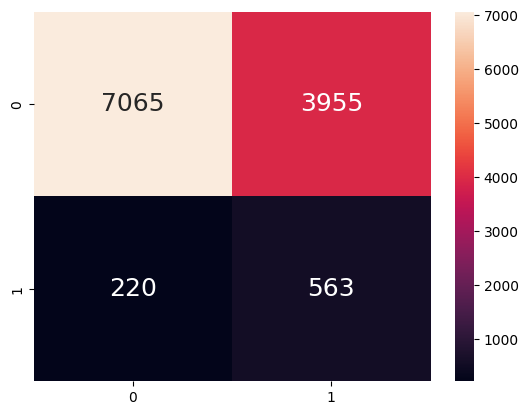

In [149]:
threshold = optimal_threshold
y_pred_probs = model_scaled2.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

In [181]:
# Export Models
joblib.dump(scaler, 'scaler.pkl')

model0.save("nn_scaled0.keras")  # Save as keras format
model_scaled1.save("nn_scaled1.keras")  # Save as keras format
model_scaled2.save("nn_scaled2.keras")  # Save as keras format

['scaler.pkl']

### Undersampling + Oversampling in train set (performance not as good)

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define SMOTE with a 20% ratio
smote2 = SMOTE(sampling_strategy=0.2, random_state=99) 

# Apply SMOTE only to training data
X_train_resampled, y_train_resampled = smote2.fit_resample(X_train, y_train)
X_train_resampled.head()
y_train_resampled.head()

# Check new class distribution
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

from sklearn.utils import resample

# Reset index for proper alignment

temp_df = pd.concat([y_train_resampled.to_frame(), X_train_resampled], axis=1)

df_majority = temp_df[temp_df.status_label == "alive"]
df_minority = temp_df[temp_df.status_label == "failed"]

# Downsample majority class
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

df_balanced = pd.concat([df_majority_downsampled, df_minority])
df_balanced.head()
df_balanced.info()

X_train_resampled = df_balanced.drop(columns=["status_label"])
y_train_resampled = df_balanced["status_label"]

print("After Resampling:", Counter(y_train_resampled))

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
0,0.443614,1.325224,0.037229,0.120254,0.144364,-0.125137,0.201965,0.495075,1.988389,0.234437,0.083025,0.663165,0.353194,0.060248,1.988389,0.701397,1.868135
1,0.547747,1.016354,0.041508,0.092342,0.235912,-0.005057,0.167280,0.094608,1.279916,0.271378,0.050834,0.263562,0.313871,-0.126166,1.279916,0.877052,1.187574
2,0.734755,0.542063,0.034355,0.085664,0.202248,0.034192,0.172267,1.292791,0.908049,0.000000,0.051308,0.365987,0.170311,0.646988,0.908049,0.188054,0.822386
3,0.334661,0.614336,0.045910,0.152373,0.043800,0.052742,0.237116,0.964029,1.018876,0.261522,0.106462,0.404540,0.168022,0.221913,1.018876,0.500362,0.866503
4,0.322996,0.320987,0.084279,0.112088,0.166023,-0.016262,0.112689,0.234290,0.592612,0.408306,0.027809,0.271625,0.183425,0.005049,0.592612,0.699802,0.480525


0    alive
1    alive
2    alive
3    alive
4    alive
Name: status_label, dtype: object

Before SMOTE: Counter({'alive': 51423, 'failed': 3654})
After SMOTE: Counter({'alive': 51423, 'failed': 10284})


,status_label,X1,X2,X3,X4,X5,X6,X7,X8,X9,X11,X12,X13,X14,X15,X16,X17,X18
18051,alive,0.224083,0.929302,0.086755,-0.191282,0.118315,-0.473901,0.051899,0.401874,0.762043,0.311909,-0.278037,-0.167259,0.135229,-0.367062,0.762043,0.695928,0.953325
53738,alive,0.142399,0.000000,0.003371,0.083489,0.000000,0.046360,0.022602,1.549674,0.115104,0.200664,0.080118,0.115104,0.050931,-0.004014,0.115104,0.336059,0.031615
10448,alive,0.640076,1.366891,0.014738,0.102422,0.106177,0.059656,0.320377,3.337076,1.593782,0.000000,0.087684,0.226891,0.334838,0.096182,1.593782,0.342175,1.491360
53311,alive,0.776003,0.218576,0.018653,0.036436,0.165205,0.009312,0.151521,1.041755,0.474572,0.139355,0.017783,0.255995,0.085335,-0.368290,0.474572,0.248703,0.438136
22979,alive,0.347550,0.696752,0.048127,0.153118,0.063578,0.048450,0.251276,0.758172,1.034777,0.460281,0.104991,0.338025,0.148794,0.062756,1.034777,0.642594,0.881659


<class 'pandas.core.frame.DataFrame'>
Index: 20568 entries, 18051 to 61706
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  20568 non-null  object 
 1   X1            20568 non-null  float64
 2   X2            20568 non-null  float64
 3   X3            20568 non-null  float64
 4   X4            20568 non-null  float64
 5   X5            20568 non-null  float64
 6   X6            20568 non-null  float64
 7   X7            20568 non-null  float64
 8   X8            20568 non-null  float64
 9   X9            20568 non-null  float64
 10  X11           20568 non-null  float64
 11  X12           20568 non-null  float64
 12  X13           20568 non-null  float64
 13  X14           20568 non-null  float64
 14  X15           20568 non-null  float64
 15  X16           20568 non-null  float64
 16  X17           20568 non-null  float64
 17  X18           20568 non-null  float64
dtypes: float64(17), object(1)
m

Epoch 1/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5708 - loss: 0.7604 - val_accuracy: 0.8489 - val_loss: 0.5975
Epoch 2/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6241 - loss: 0.6585 - val_accuracy: 0.6584 - val_loss: 0.6050
Epoch 3/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6324 - loss: 0.6410 - val_accuracy: 0.8048 - val_loss: 0.5563
Epoch 4/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6434 - loss: 0.6339 - val_accuracy: 0.8357 - val_loss: 0.5015
Epoch 5/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6560 - loss: 0.6279 - val_accuracy: 0.8267 - val_loss: 0.5018
Epoch 6/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6524 - loss: 0.6270 - val_accuracy: 0.8336 - val_loss: 0.4819
Epoch 7/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6570 - loss: 0.6243 - val_accuracy: 0.5274 - val_loss: 0.6142
Epoch 8/100
643/643 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6584 - loss: 0.6192 - val_accu

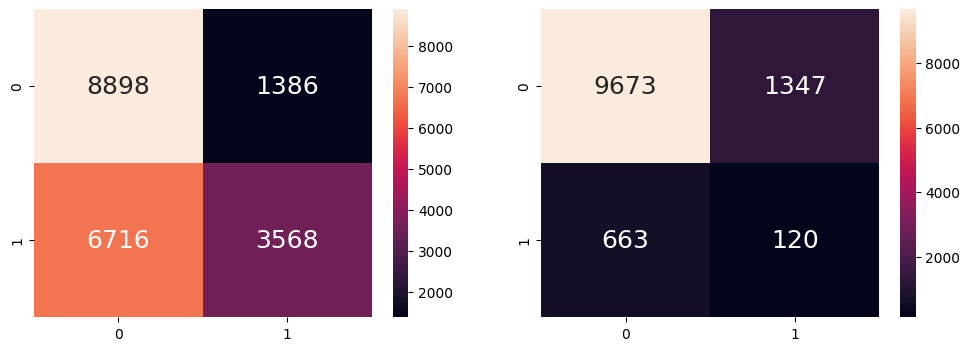

In [45]:
model_resampled = train_nn(X_train_resampled, y_train_resampled, X_val, y_val, X_test, y_test)

##### Lowering threshold

In [111]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_resampled.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
Optimal Threshold: 0.39653575


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.95      0.54      0.69     11020
           1       0.08      0.60      0.15       783

    accuracy                           0.54     11803
   macro avg       0.52      0.57      0.42     11803
weighted avg       0.89      0.54      0.65     11803



<Axes: >

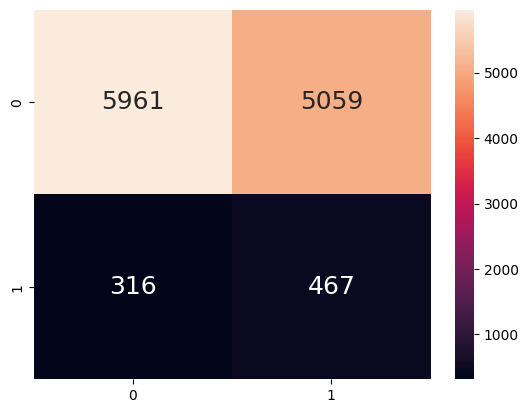

In [112]:
threshold = optimal_threshold
y_pred_probs = model_resampled.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Keras with class weights

### Inverse Class Frequency

- weight = total_samples / (number_of_classes x class_samples)
- weight_alive = (51423+3654)/(2x51423) = 0.536
- weight_failed = (51423+3654)/(2x3654) = 7.54

Epoch 1/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5640 - loss: 0.7579 - val_accuracy: 0.8348 - val_loss: 0.6280
Epoch 2/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6154 - loss: 0.6516 - val_accuracy: 0.5144 - val_loss: 0.7102
Epoch 3/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6193 - loss: 0.6370 - val_accuracy: 0.6673 - val_loss: 0.6689
Epoch 4/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6191 - loss: 0.6372 - val_accuracy: 0.4202 - val_loss: 0.8544
Epoch 5/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6281 - loss: 0.6334 - val_accuracy: 0.3340 - val_loss: 0.8671
Epoch 6/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6255 - loss: 0.6321 - val_accuracy: 0.2413 - val_loss: 1.0073
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 1s 760us/step
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Train set evaluation:
Train Loss: 0.6819239854812622
Train Accuracy: 0.7022169232368469
Train Precision: 0.11125343092406222
Tr

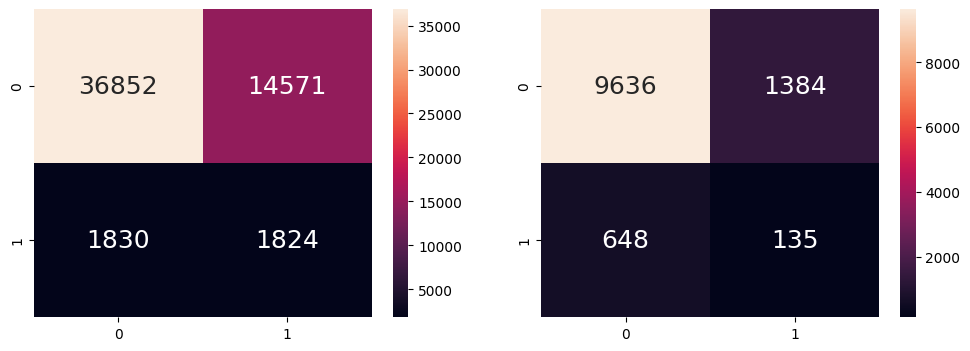

In [150]:
model_weighted = train_nn(X_train, y_train, X_val, y_val, X_test, y_test, class_weight_dict = {0: 0.536, 1: 7.54})

##### Lowering threshold

In [182]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_weighted.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step
Optimal Threshold: 0.4417148


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.96      0.38      0.55     11020
           1       0.08      0.77      0.15       783

    accuracy                           0.41     11803
   macro avg       0.52      0.58      0.35     11803
weighted avg       0.90      0.41      0.52     11803



<Axes: >

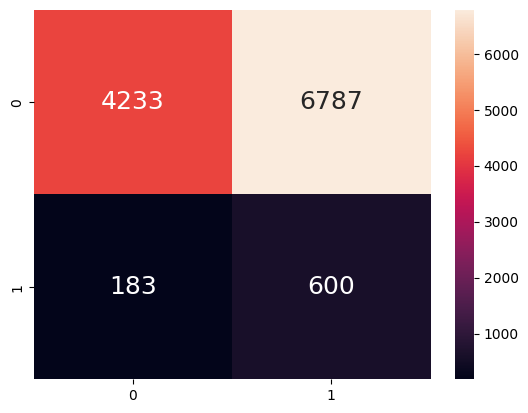

In [183]:
threshold = optimal_threshold
y_pred_probs = model_weighted.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Square Root Inverse Frequency

- w_alive = 1/sqrt(51423) = 0.004410 
- w_failed = 1/sqrt(3654) = 0.01654
- Ratio = 1 : 3.75

Epoch 1/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8059 - loss: 0.7047 - val_accuracy: 0.9319 - val_loss: 0.3438
Epoch 2/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9183 - loss: 0.5801 - val_accuracy: 0.9323 - val_loss: 0.3164
Epoch 3/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9227 - loss: 0.5705 - val_accuracy: 0.9323 - val_loss: 0.3211
Epoch 4/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9239 - loss: 0.5652 - val_accuracy: 0.9326 - val_loss: 0.2950
Epoch 5/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9244 - loss: 0.5592 - val_accuracy: 0.9326 - val_loss: 0.3137
Epoch 6/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9248 - loss: 0.5558 - val_accuracy: 0.7587 - val_loss: 0.4756
Epoch 7/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9242 - loss: 0.5560 - val_accuracy: 0.6805 - val_loss: 0.5962
Epoch 8/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0

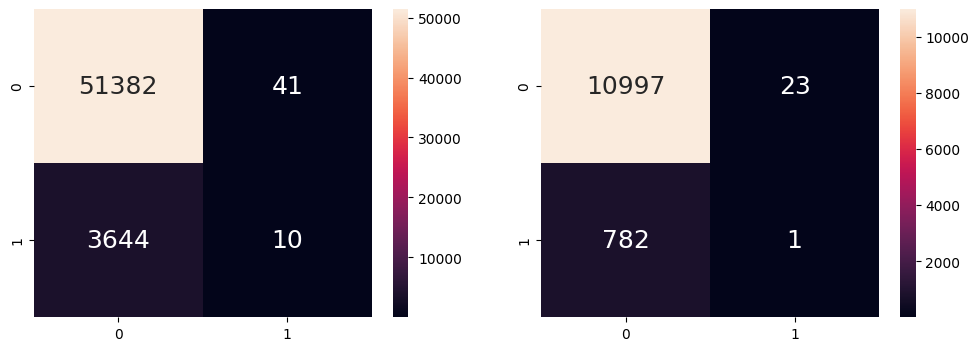

In [153]:
model_weighted2 = train_nn(X_train, y_train, X_val, y_val, X_test, y_test, class_weight_dict = {0: 1, 1: 3.75})

##### Lowering threshold

In [184]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_weighted2.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step
Optimal Threshold: 0.25253558


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85     11020
           1       0.11      0.39      0.17       783

    accuracy                           0.75     11803
   macro avg       0.53      0.58      0.51     11803
weighted avg       0.89      0.75      0.81     11803



<Axes: >

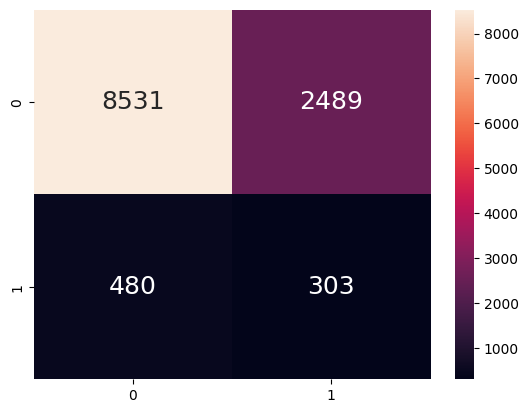

In [185]:
threshold = optimal_threshold
y_pred_probs = model_weighted2.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Trying different ratios

- Ratio = 1 : 2

Epoch 1/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8309 - loss: 0.5472 - val_accuracy: 0.9334 - val_loss: 0.2519
Epoch 2/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9286 - loss: 0.3940 - val_accuracy: 0.9323 - val_loss: 0.2603
Epoch 3/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9318 - loss: 0.3805 - val_accuracy: 0.9264 - val_loss: 0.2696
Epoch 4/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9332 - loss: 0.3766 - val_accuracy: 0.9320 - val_loss: 0.2551
Epoch 5/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9332 - loss: 0.3744 - val_accuracy: 0.9328 - val_loss: 0.2470
Epoch 6/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9339 - loss: 0.3720 - val_accuracy: 0.9324 - val_loss: 0.2555
Epoch 7/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9339 - loss: 0.3706 - val_accuracy: 0.9312 - val_loss: 0.2677
Epoch 8/100
1722/1722 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9338 - loss: 0

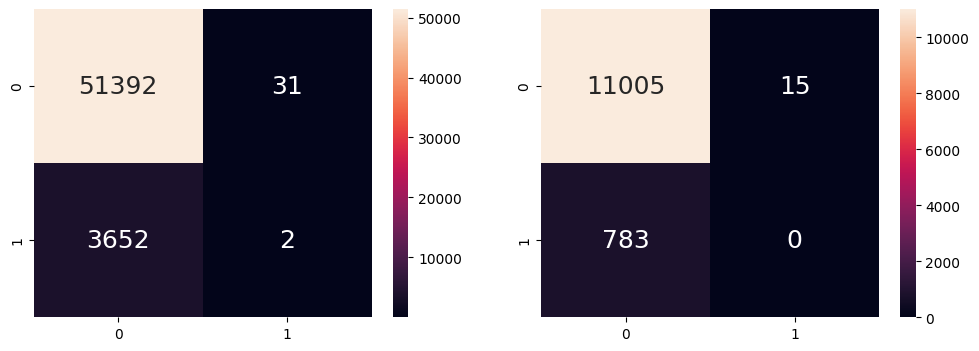

In [169]:
model_weighted3 = train_nn(X_train, y_train, X_val, y_val, X_test, y_test, class_weight_dict = {0: 1.0, 1: 2.0})

##### Lowering threshold

In [186]:
y_test_encoded = y_test.map({"alive": 0, "failed": 1})
y_pred_probs = model_weighted3.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_probs) # get False Potive Rate, True Positive Rate and thresholds
optimal_idx = (tpr - fpr).argmax() # Find threshold with maximum difference between True Positve Rate and False Potive Rate
optimal_threshold = thresholds[optimal_idx] # Find best trade-off between high true positives and low false positives
print("Optimal Threshold:", optimal_threshold)

369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
Optimal Threshold: 0.11984661


369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.95      0.76      0.84     11020
           1       0.11      0.41      0.17       783

    accuracy                           0.73     11803
   macro avg       0.53      0.58      0.50     11803
weighted avg       0.89      0.73      0.80     11803



<Axes: >

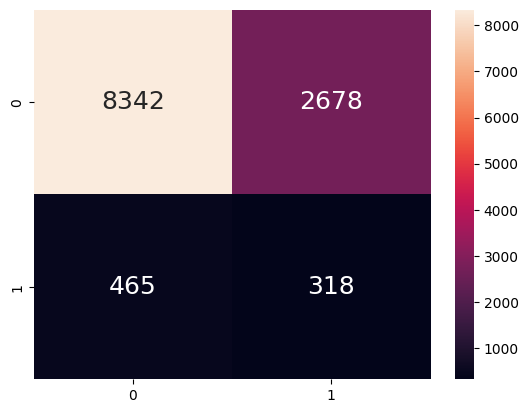

In [187]:
threshold = optimal_threshold
y_pred_probs = model_weighted3.predict(X_test)  # Get probabilities
y_pred = (y_pred_probs >= threshold).astype(int)  # Apply new threshold
print("Classification Report with Optimal Threshold:\n", classification_report(y_test_encoded, y_pred))
sns.heatmap(confusion_matrix(y_test_encoded, y_pred),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

# Altman's Z-Score Model

## Assume 'Grey' Zone is Alive

In [94]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole dataset

Z_pred
0    50015
1    28667
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77     73462
           1       0.10      0.55      0.17      5220

    accuracy                           0.64     78682
   macro avg       0.53      0.60      0.47     78682
weighted avg       0.90      0.64      0.73     78682



<Axes: >

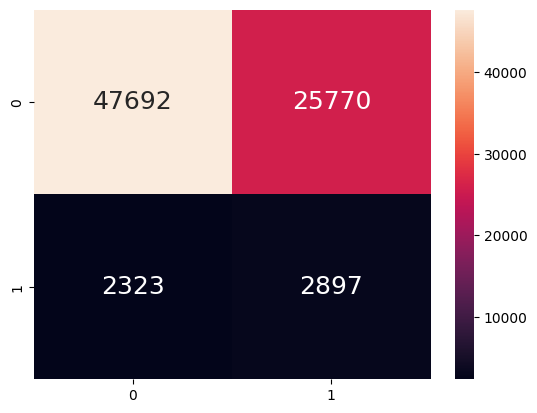

In [95]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 1 if x == 'High' else 0)

# Look at distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Testset only

Z_pred
0    7570
1    4233
Name: count, dtype: int64

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
24510,2000,alive,0.480480,0.155982,0.146283,9.630899,1.232028,8.288254,0
66308,2008,alive,0.137761,0.160837,0.114331,0.768345,1.893540,3.122325,0
31428,2008,alive,0.645622,-7.811019,-0.681789,8.647940,1.183376,-6.038446,1
28895,2017,alive,-0.392750,-0.805264,-0.231173,9.428152,2.811259,6.106610,0
14001,2005,alive,0.314681,1.886737,-0.032425,17.652893,0.175749,13.679531,0


Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.95      0.65      0.78     11020
           1       0.10      0.55      0.17       783

    accuracy                           0.65     11803
   macro avg       0.53      0.60      0.47     11803
weighted avg       0.90      0.65      0.74     11803



<Axes: >

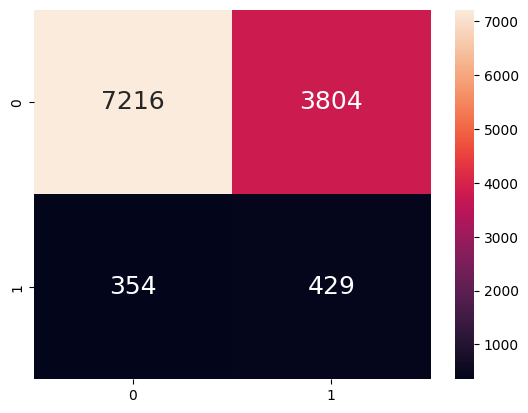

In [97]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

## Assume 'Grey' Zone is Failed

In [98]:
df2 = pd.read_csv("american_bankruptcy.csv")
df2['ZX1'] = (df2["X1"] - df2["X14"]) / df2["X10"] # (Current Assets - Current Liabilities) / Total Assets
df2['ZX2'] = df2['X15']/df2['X10'] # Retained Earnings / Total Assets
df2['ZX3'] = df2["X12"]/df2['X10'] # EBIT / Total Assets
df2['ZX4'] = df2['X8']/df2['X17'] # Market Captitalization / Total Liabilities
df2['ZX5'] = df2['X9']/df2['X10'] # Sales / Total Assets

df2["Z"] = 1.2*df2["ZX1"] + 1.4*df2["ZX2"] + 3.3*df2["ZX3"] + 0.6*df2["ZX4"] + 1*df2["ZX5"]


# Define conditions
conditions = [
    df2["Z"] < 1.8,  # High risk
    df2["Z"] > 3.0   # Low risk
]

# Define corresponding labels
labels = ['High', 'Low']

# Create the column using np.select, with default as 'Grey'
df2["Z_pred"] = np.select(conditions, labels, default='Grey')

# Remove unnecessary columns 
df2 = df2[["year","status_label","ZX1","ZX2","ZX3","ZX4","ZX5","Z","Z_pred"]]
df2.head()
df2["Z_pred"].value_counts()

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
0,1999,alive,0.468896,0.271291,0.095355,0.928438,1.382369,3.196587,Low
1,2000,alive,0.513588,0.290751,0.065241,1.042794,1.245637,3.109968,Low
2,2001,alive,0.402974,0.196569,0.006633,0.911564,0.899355,2.226949,Grey
3,2002,alive,0.280849,0.180749,0.005204,0.365979,0.883074,1.709901,High
4,2003,alive,0.424286,0.185938,0.029341,0.757853,0.919167,2.240159,Grey


Z_pred
Low     36479
High    28667
Grey    13536
Name: count, dtype: int64

### Whole dataset

Z_pred
1    42203
0    36479
Name: count, dtype: int64

Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     73462
           1       0.09      0.72      0.16      5220

    accuracy                           0.49     78682
   macro avg       0.52      0.60      0.40     78682
weighted avg       0.90      0.49      0.61     78682



<Axes: >

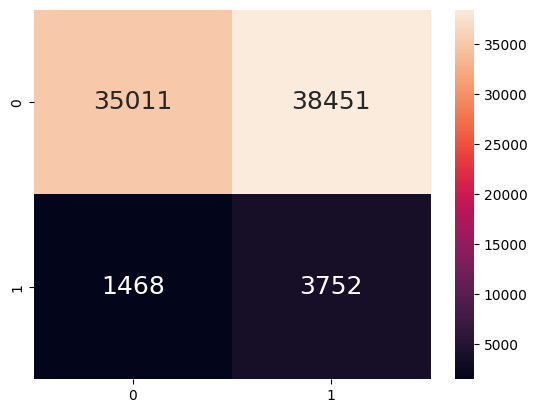

In [99]:
# assume grey and low risk is alive, high risk is failed
df2['Z_pred'] = df2['Z_pred'].apply(lambda x: 0 if x == 'Low' else 1)

# See class distribution
df2['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2["status_label"].map({"alive": 0, "failed": 1})
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})

### Testset only

Z_pred
1    6257
0    5546
Name: count, dtype: int64

,year,status_label,ZX1,ZX2,ZX3,ZX4,ZX5,Z,Z_pred
24510,2000,alive,0.480480,0.155982,0.146283,9.630899,1.232028,8.288254,0
66308,2008,alive,0.137761,0.160837,0.114331,0.768345,1.893540,3.122325,0
31428,2008,alive,0.645622,-7.811019,-0.681789,8.647940,1.183376,-6.038446,1
28895,2017,alive,-0.392750,-0.805264,-0.231173,9.428152,2.811259,6.106610,0
14001,2005,alive,0.314681,1.886737,-0.032425,17.652893,0.175749,13.679531,0


Classification Report of Z-Score Model:
               precision    recall  f1-score   support

           0       0.96      0.48      0.64     11020
           1       0.09      0.71      0.16       783

    accuracy                           0.50     11803
   macro avg       0.52      0.59      0.40     11803
weighted avg       0.90      0.50      0.61     11803



<Axes: >

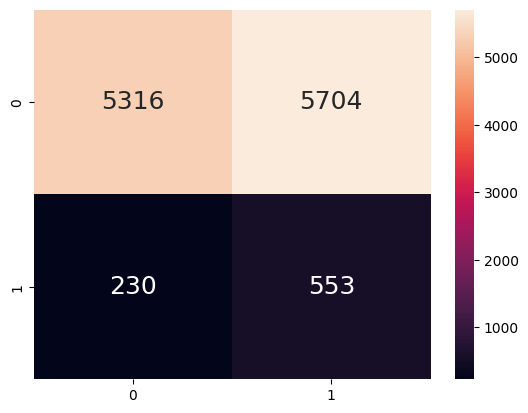

In [100]:
# Use the same indexes as in test set and apply to this new modified dataset
df2_test = df2.loc[df_test.index]

# assume grey and low risk is alive, high risk is failed
df2_test['Z_pred'].value_counts()

# Convert true y values to 0 and 1
true_y = df2_test["status_label"].map({"alive": 0, "failed": 1})

df2_test.head()
print("Classification Report of Z-Score Model:\n", classification_report(true_y, df2_test['Z_pred']))
sns.heatmap(confusion_matrix(true_y, df2_test['Z_pred']),
                   annot = True, fmt=".0f", annot_kws={"size": 18})